In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [214]:
df=pd.read_csv("/content/Creditscoring-dataset.csv")
df.head(5)

<ipython-input-214-c5d29d6aace6>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Creditscoring-dataset.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [215]:
df.shape

(100000, 28)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [217]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [218]:
df.describe().round()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.0,100000.0,100000.0,100000.0,100000.0,98035.0,100000.0,100000.0
mean,4194.0,17.0,22.0,72.0,21.0,28.0,32.0,1403.0
std,3184.0,117.0,129.0,466.0,15.0,193.0,5.0,8306.0
min,304.0,-1.0,0.0,1.0,-5.0,0.0,20.0,0.0
25%,1626.0,3.0,4.0,8.0,10.0,3.0,28.0,30.0
50%,3094.0,6.0,5.0,13.0,18.0,6.0,32.0,69.0
75%,5957.0,7.0,7.0,20.0,28.0,9.0,36.0,161.0
max,15205.0,1798.0,1499.0,5797.0,67.0,2597.0,50.0,82331.0


In [219]:
duplicates=df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [220]:
for column in df.columns:
    print(df[column].value_counts())

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363     

In [221]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [222]:
age=list(df['Age'])
for i in range(len(age)):
  if(age[i][-1]=='_'):
    age[i]=age[i][:len(age[i])-1]
  age[i]=int(age[i])
df['Age']=age
df=df[(df['Age']>0) & (df['Age']<=100)]

In [223]:
df['Occupation'].replace({'_______':'Singer'},inplace=True)

<ipython-input-223-411a9ab5c984>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'].replace({'_______':'Singer'},inplace=True)


In [224]:
df['Occupation'].value_counts()

Occupation
Singer           6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: count, dtype: int64

In [225]:
df=pd.get_dummies(df,columns=['Occupation'])

In [226]:
df['Type_of_Loan'].fillna('Not Specified',inplace=True)
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                    12452
Credit-Builder Loan                                                                                                                               1243
Personal Loan                                                                                                                                     1236
Debt Consolidation Loan                                                                                                                           1224
Student Loan                                                                                                                                      1211
                                                                                                                                                 ...  
Mortgage Loan, Mortgage Loan, Personal Loan, Credit-Builder Loan, Student Loan, D

In [227]:
df['Type_of_Loan'].sample(n=20).value_counts()

Type_of_Loan
Not Specified                                                                                                                                           3
Student Loan, Credit-Builder Loan, and Debt Consolidation Loan                                                                                          1
Student Loan, and Personal Loan                                                                                                                         1
Home Equity Loan, Auto Loan, Home Equity Loan, and Home Equity Loan                                                                                     1
Home Equity Loan, Credit-Builder Loan, Auto Loan, Not Specified, Payday Loan, and Mortgage Loan                                                         1
Student Loan, Personal Loan, Home Equity Loan, Home Equity Loan, Not Specified, and Not Specified                                                       1
Credit-Builder Loan, and Payday Loan                           

In [228]:
df['Type_of_Loan']=df['Type_of_Loan'].apply(lambda x: x.split(', '))
loan_types=set([loan for sublist in df['Type_of_Loan'] for loan in sublist])

for loan_type in loan_types:
  df[loan_type]=df['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)
df.drop('Type_of_Loan',axis=1,inplace=True)

In [229]:
df['Not Specified']=df['Payday Loan']+df['and Not Specified']
df.replace({2:1,3:1},inplace=True)
df.drop('and Not Specified',axis=1,inplace=True)

In [230]:
loans=['Credit-Builder Loan','Home Equity Loan','Personal Loan','Debt Consolidation Loan','Payday Loan','Auto Loan','Student Loan']
for i in loans:
  df[i]=df[i]+df['and '+i]
  df[i].replace({2:1},inplace=True)
  df.drop('and '+i,axis=1,inplace=True)

In [231]:
debt=list(df['Outstanding_Debt'])
for i in range(len(debt)):
  if(debt[i][-1]=='_'):
    debt[i]=debt[i][:len(debt[i])-1]
    debt[i]=float(debt[i])
df['Outstanding_Debt']=debt

In [232]:
df['Credit_Mix'].replace({'_':'Standard'},inplace=True)
df['Credit_Mix'].replace({'Good':2,'Standard':1,'Bad':0},inplace=True)
df['Credit_Mix'].value_counts()

Credit_Mix
1    55150
2    23614
0    18460
Name: count, dtype: int64

In [233]:
labels=df["Credit_Score"].value_counts()
print(labels)
scaling=pd.DataFrame({"Scaling":labels.index,"Counts":labels.values})
scaling

Credit_Score
Standard    51724
Poor        28205
Good        17295
Name: count, dtype: int64


,Scaling,Counts
0,Standard,51724
1,Poor,28205
2,Good,17295


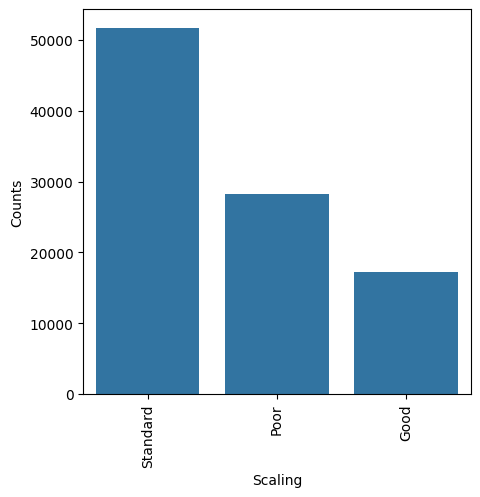

In [234]:
plt.figure(figsize=(5,5))
sns.barplot(x='Scaling',y='Counts',data=scaling)
plt.xticks(rotation=90)
plt.show()

In [235]:
df['Credit_Score']=df['Credit_Score'].replace({'Good':2,'Standard':1,'Poor':0})

In [236]:
df['Payment_of_Min_Amount'].replace({'No':0,'Yes':1,'NM':0},inplace=True)

In [237]:
df['Changed_Credit_Limit'].replace('_',np.mean(df['Changed_Credit_Limit'][df['Changed_Credit_Limit']!='_'].astype(float)),inplace=True)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [238]:
df['Num_Credit_Inquiries'].fillna(np.mean(df['Num_Credit_Inquiries']),inplace=True)

In [239]:
amount=list(df['Amount_invested_monthly'])
for i in range(len(amount)):
  amount[i]=10000
  amount[i]=float(amount[i])

In [240]:
df['Amount_invested_monthly']=amount
df['Amount_invested_monthly'].fillna(np.mean(df['Amount_invested_monthly']),inplace=True)

In [241]:
df['Num_of_Delayed_Payment'].fillna('nan',inplace=True)
delay=list(df['Num_of_Delayed_Payment'])
for i in range(len(delay)):
  if(delay[i]!='nan'):
    if(delay[i][-1]=='_'):
      delay[i]=delay[i][:len(delay[i])-1]
    delay[i]=int(delay[i])

In [242]:
df['Num_of_Delayed_Payment']=delay
df['Num_of_Delayed_Payment'].replace({'nan':np.mean(df['Num_of_Delayed_Payment'][df['Num_of_Delayed_Payment']!='nan'])},inplace=True)

In [243]:
num_loan=list(df['Num_of_Loan'])
for i in range(len(num_loan)):
  if(num_loan[i][-1]=='_'):
    num_loan[i]=num_loan[i][:len(num_loan[i])-1]
  num_loan[i]=int(num_loan[i])

df['Num_of_Loan']=num_loan
df['Num_of_Loan'].fillna(np.mean(df['Num_of_Loan']),inplace=True)

In [244]:
month_balance=list(df['Monthly_Balance'])
for i in range(len(month_balance)):
  if(month_balance[i]=='__-333333333333333333333333333__'):
    month_balance[i]=0
  month_balance[i]=float(month_balance[i])
df['Monthly_Balance']=month_balance
df['Monthly_Balance'].fillna(np.mean(df['Monthly_Balance']),inplace=True)

In [245]:
df['Monthly_Inhand_Salary'].fillna(np.mean(df['Monthly_Inhand_Salary']),inplace=True)

In [246]:
annual_income=list(df['Annual_Income'])
for i in range(len(list(df['Annual_Income']))):
  if(annual_income[i][-1]=='_'):
    annual_income[i]=annual_income[i][:len(annual_income[i])-1]
  annual_income[i]=float(annual_income[i])

df['Annual_Income']=annual_income
df['Annual_Income'].fillna(np.mean(df['Annual_Income']),inplace=True)

In [247]:
df['Credit_History_Age'].fillna(0,inplace=True)

In [248]:
credit_his=list(df['Credit_History_Age'])
for i in range(0,len(credit_his)):
  if(credit_his[i]!=0):
    l1=credit_his[i].partition('Years')
    years=l1[0]
    l2=l1[-1].partition('and')
    l3=l2[-1].partition('Months')
    months=l3[0]
    credit_his[i]=int(years)*365+int(months)*30
df['Credit_History_Age']=credit_his
df['Credit_History_Age']

0         8060
1            0
3         8150
4         8180
5         8210
         ...  
99995    11495
99996    11525
99997    11555
99998    11585
99999    11615
Name: Credit_History_Age, Length: 97224, dtype: int64

In [249]:
df['Month'].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8},inplace=True)
# df['Month']= df['Month'].astype(float)
df['Month']

0        1
1        2
3        4
4        5
5        6
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 97224, dtype: int64

In [250]:
df['Payment_Behaviour'].replace({'Low_spent_Small_value_payments':0,'Low_spent_Medium_value_payments':1,
                                 'Low_spent_Large_value_payments':2,'High_spent_Small_value_payments':3,
                                 'High_spent_Medium_value_payments':4,'High_spent_Large_value_payments':5},inplace=True)
df['Payment_Behaviour'].replace({'!@9#%8':np.mean(df['Payment_Behaviour'][df['Payment_Behaviour']!='!@9#%8'])},inplace=True)
df['Payment_Behaviour']

0        3.000000
1        2.000000
3        0.000000
4        4.000000
5        2.244371
           ...   
99995    5.000000
99996    4.000000
99997    5.000000
99998    2.000000
99999    2.244371
Name: Payment_Behaviour, Length: 97224, dtype: float64

In [251]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Singer',
       'Occupation_Teacher', 'Occupation_Writer', 'Payday Loan',
       'and Mortgage Loan', 'Credit

In [252]:
x=df[['Month','Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Singer',
       'Occupation_Teacher', 'Occupation_Writer', 'Personal Loan', 'Auto Loan','Debt Consolidation Loan',
      'Payday Loan','Home Equity Loan','Student Loan','Mortgage Loan','Credit-Builder Loan','Not Specified']]

In [253]:
y=df['Credit_Score']
y

0        2
1        2
3        2
4        2
5        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 97224, dtype: int64

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f"Train:{x_train.shape},{y_train.shape}")
print(f"Test:{x_test.shape},{y_test.shape}")

Train:(77779, 46),(77779,)
Test:(19445, 46),(19445,)


In [255]:
sc=StandardScaler()
x_trains=sc.fit_transform(x_train)
x_tests=sc.transform(x_test)

In [256]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_trains,y_train)

RandomForestClassifier()

In [257]:
predict=model.predict(x_tests)

Accuracy on train data by Random Forest Classifier:100.0
Accuracy on test data by Random Forest Classifier:79.24402159938288


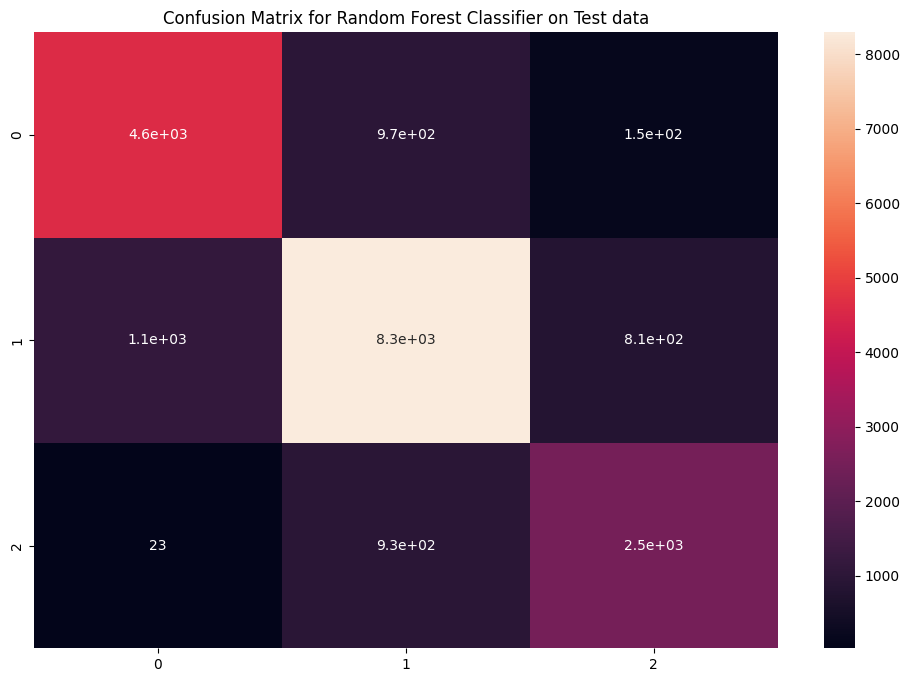

In [258]:
rf_model=RandomForestClassifier(random_state=10)
rf_model.fit(x_train,y_train)
predic=rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier:{accuracy_score(y_train,rf_model.predict(x_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier:{accuracy_score(y_test,predic)*100}")
cf_matrix = confusion_matrix(y_test,predic)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test data")
plt.show()

In [266]:
#Predict
test=[[6,40,69876.89,5790.98,5,8,23,11,60,20.0,25.3,8.0,0,587.08,35.564,342.98,1,546.93,656,45,6.0,458.87,False,False,
       False,False,False,False,False,False,False,False,True,False,False,False,False,1,1,0,0,1,1,1,0,0]]

In [267]:
p=['Poor','Standard','Good']
p[model.predict(test)[0]]

'Standard'